# Семинар 4: визуализация данных, EDA

## Вступление

На семинаре мы будем заниматься построением различных визуализаций. Наша цель — провести **разведочный анализ данных** (exploratory data analysis, EDA), чтобы исследовать поведение данных и выявить в них закономерности. Мы продолжим работать с данными о пассажирах Титаника.

### Цели:
* познакомиться с библиотеками matplotlib, seaborn и визуализациями в pandas
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

### Как нужно строить графики:
1. Если график стандартный, используйте matplotlib напрямую из pandas
2. Если график нестандартный, используйте matplotlib
3. Если график совсем нестандартный, то разделите его на несколько стандартных и используйте matplotlib
4. Если нужны профильные красивые графики, график гистограммы с распределением, японские свечи, график pairplot или heatmap, то используйте seaborn (это всё тоже можно сделать в matplotlib, но будет дольше)
5. Если у вас есть два часа времени, чтобы построить один график нормального качества, то используйте plotly
6. Если вам нужно, чтобы получился один красивый график, за который вам очень хорошо заплатят, то используйте plotly

### План семинара:
1. Учимся строить графики
2. Обрабатываем признаки
3. Однофакторный анализ

In [2]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


import sklearn

warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 1. Учимся строить графики

Сперва загрузим данные и ещё раз изучим базовую информацию при помощи pandas.

In [4]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
    sep=";",
)

In [5]:
print(f"Data size: {df.shape}")
df.head()

Data size: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
numeric = df.select_dtypes(exclude='object').columns

In [7]:
df.head().style.highlight_max(props='color:black;background:coral', subset=numeric).highlight_min(subset=numeric, color='blue')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Thayer),female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.000000,0,0,373450,8.050000,nan,S


In [8]:
df.head().style.highlight_null(color='blue')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Thayer),female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.000000,0,0,373450,8.050000,nan,S


In [9]:
df.describe().T.style.background_gradient('Blues')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [10]:
df.corr(numeric_only=True).style.background_gradient(cmap='Blues')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
df.style.bar(subset='Age').highlight_null(subset='Age', color='black')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Thayer),female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,Moran; Mr. James,unknown,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,McCarthy; Mr. Timothy J,male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,Palsson; Master. Gosta Leonard,male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,Johnson; Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,Nasser; Mrs. Nicholas (Adele Achem),female,14.000000,1,0,237736,30.070800,nan,C


In [12]:
df.isna().mean().to_frame()  # df.isnull() — то же самое, что df.isna()

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [13]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
605,606,0,3,Lindell; Mr. Edvard Bengtsson,male,36.0,1,0,349910,15.5500,NaN,S
71,72,0,3,Goodwin; Miss. Lillian Amy,female,16.0,5,2,CA 2144,46.9000,NaN,S
797,798,1,3,Osman; Mrs. Mara,female,31.0,0,0,349244,8.6833,NaN,S
566,567,0,3,Stoytcheff; Mr. Ilia,male,19.0,0,0,349205,7.8958,NaN,S
33,34,0,2,Wheadon; Mr. Edward H,male,66.0,0,0,C.A. 24579,10.5000,NaN,S


Теперь давайте посмотрим на данные глазами. По диагонали — маргинальное распределение каждой числовой переменной с учётом целевой переменной. В остальных ячейках — scatter plot каждой пары числовых переменных с учётом целевой переменной.

In [14]:
sns.set_style('darkgrid')

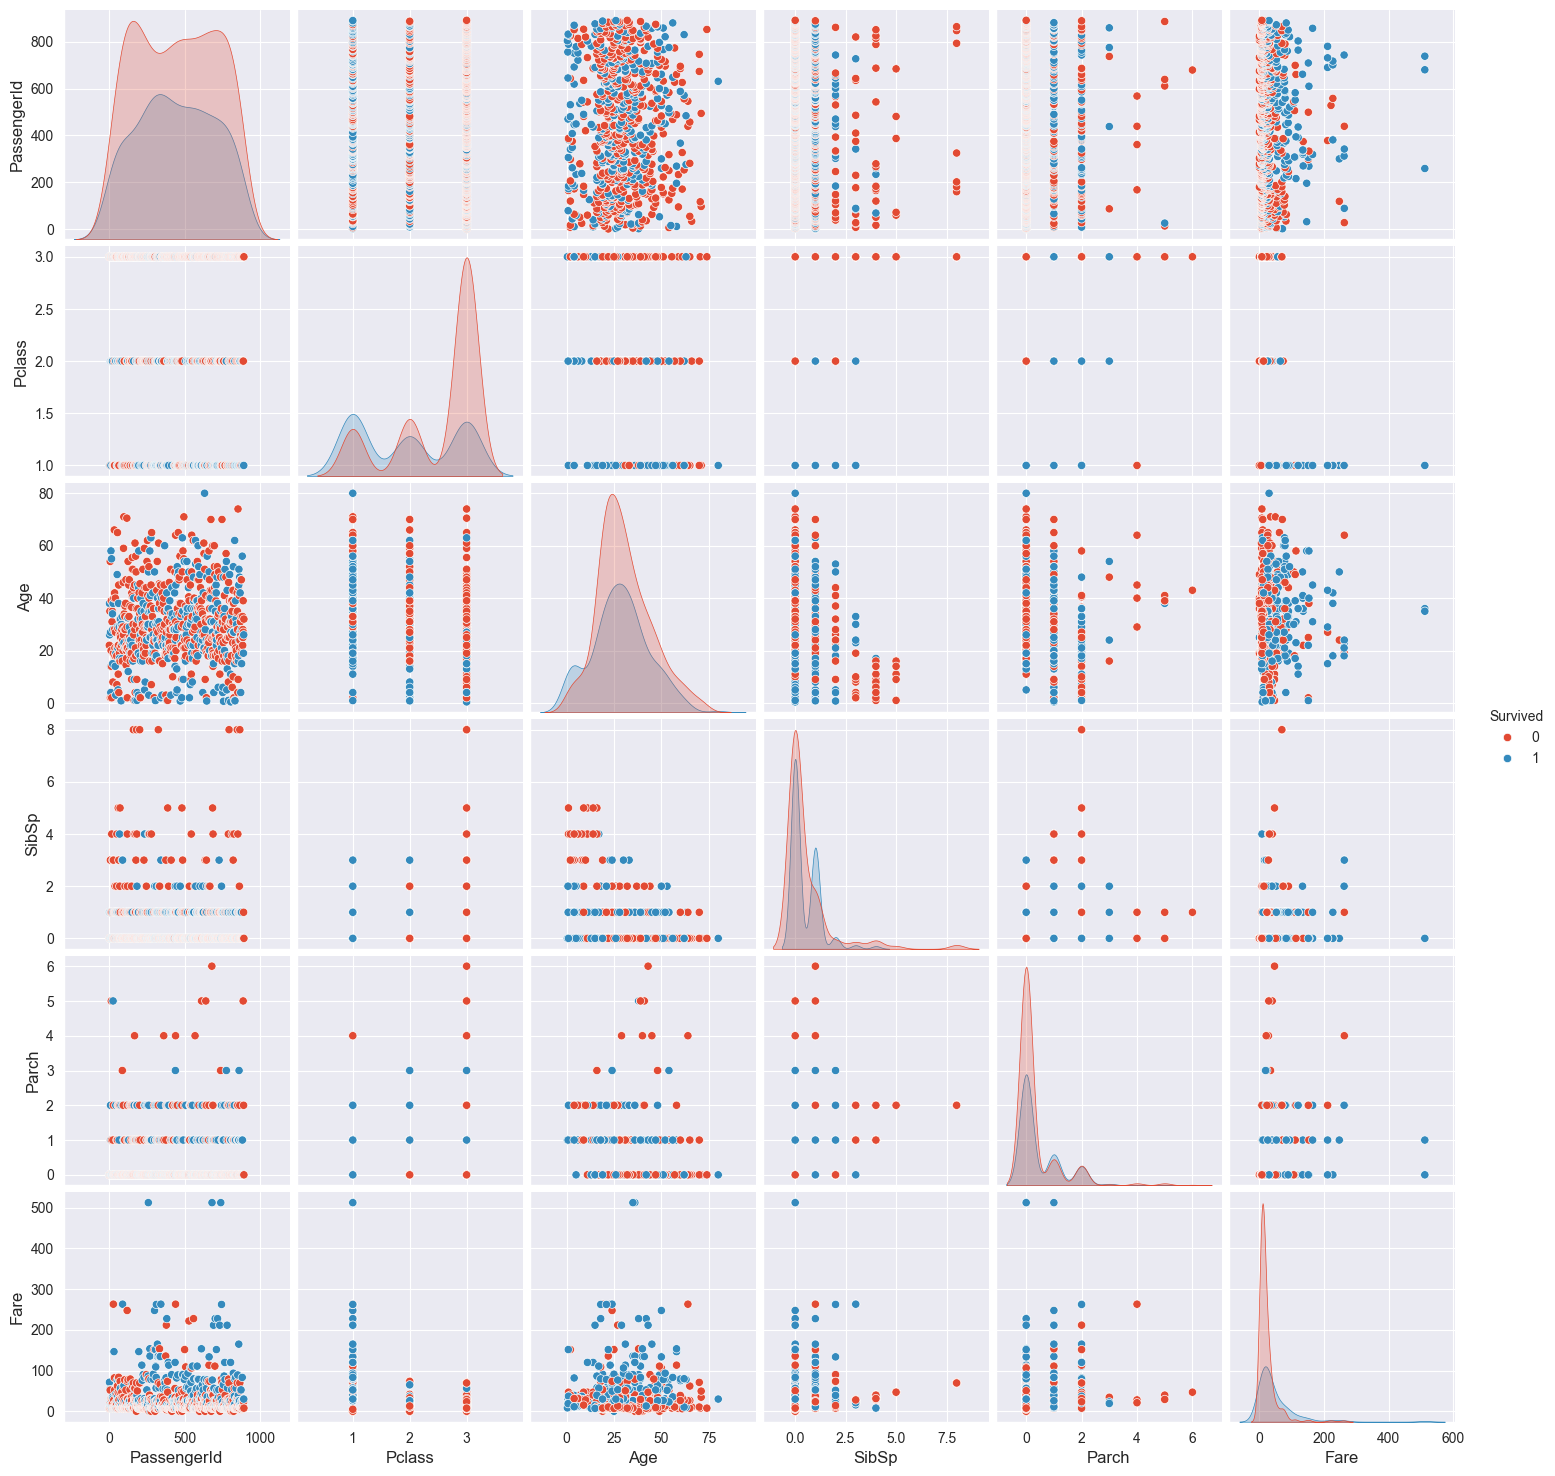

In [15]:
sns.pairplot(df, hue='Survived')

plt.show()

Начинаем работу с графиками matplotlib и pandas (вызывает те же функции matplotlib).

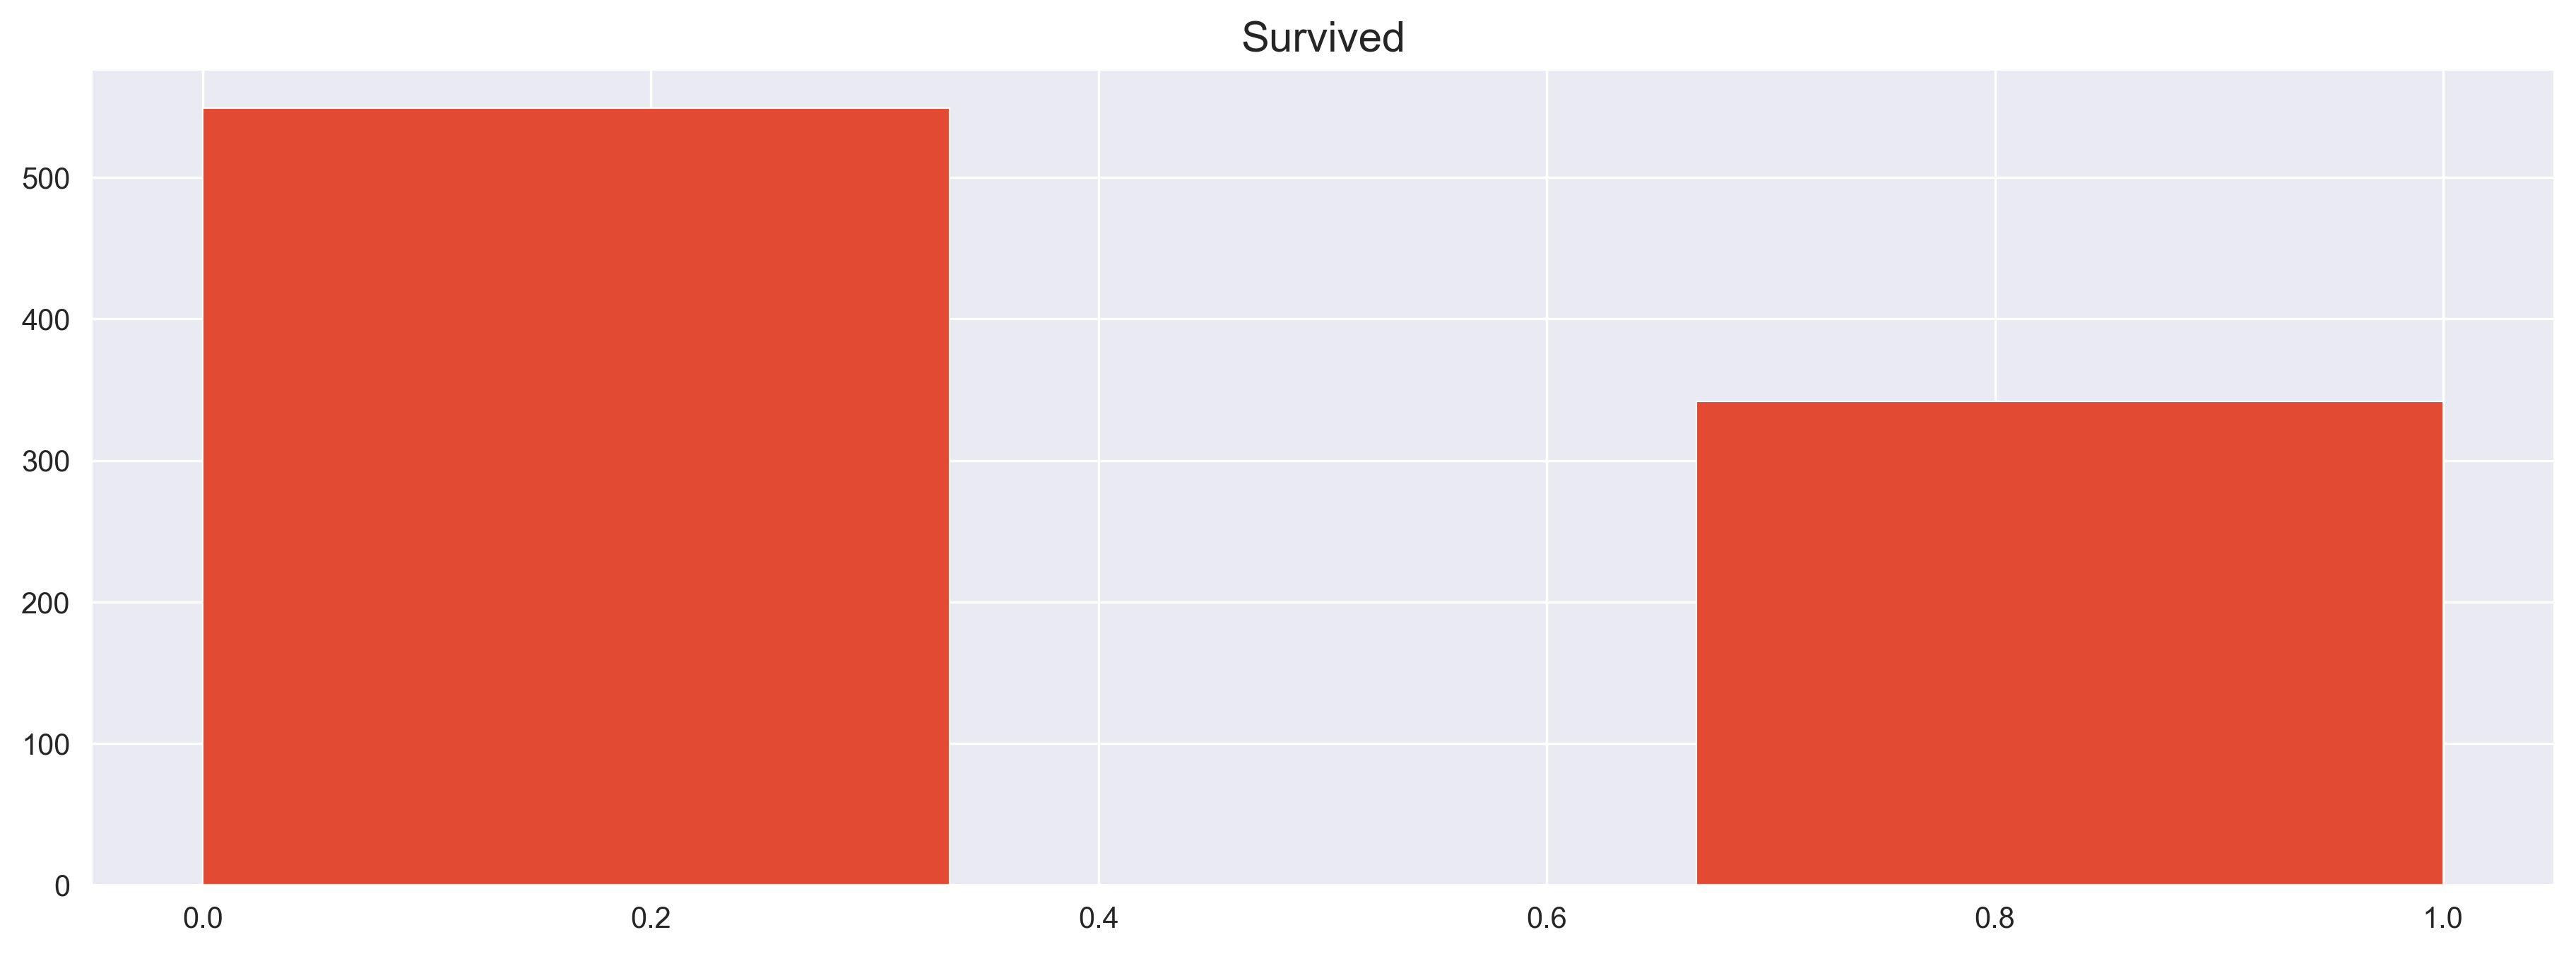

In [16]:
plt.figure(figsize=(15, 5), dpi=300)
plt.title("Survived")
df["Survived"].hist(bins=3);

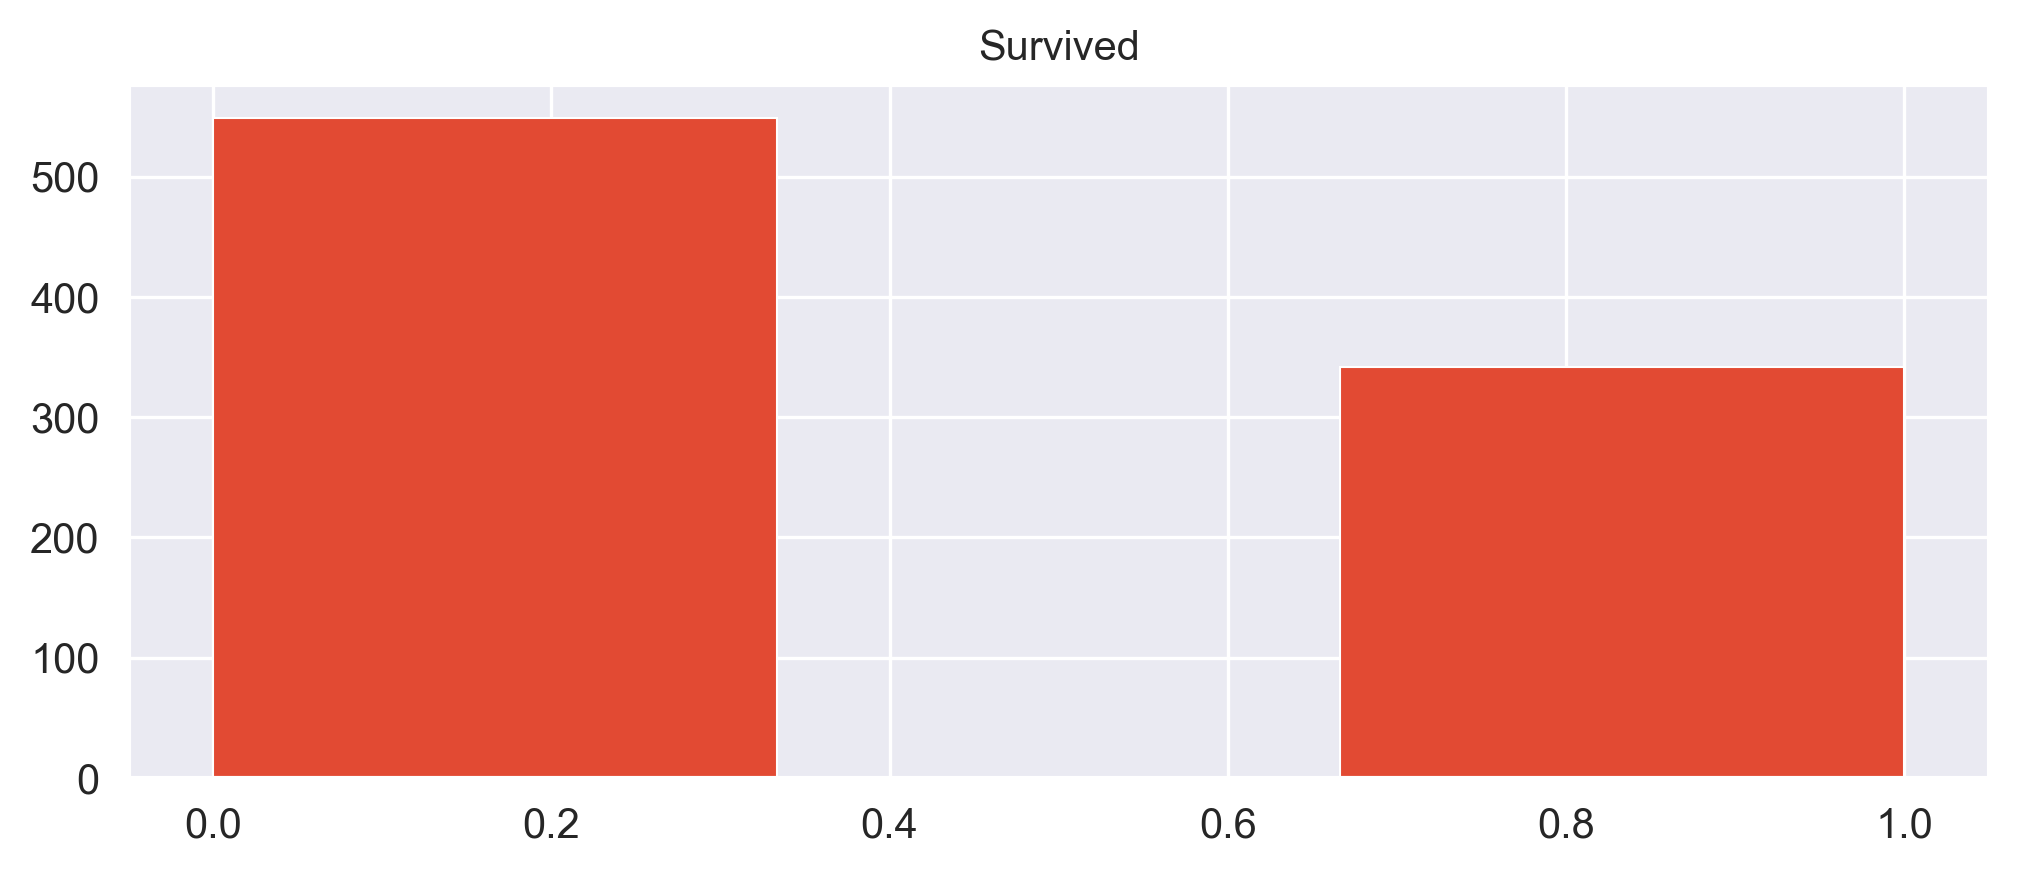

In [17]:
# То же самое, но только с matplotlib
plt.figure(figsize=(8, 3), dpi=300)
plt.title("Survived", fontsize=10)
plt.hist(df["Survived"], bins=3);

Построим гистаграмму по возрасту. Обратите внимание, что размер фигуры (и многие другие параметры, например, размер шрифтов) можно задавать один раз на весь нутбук при помощи `plt.rc.Params`.

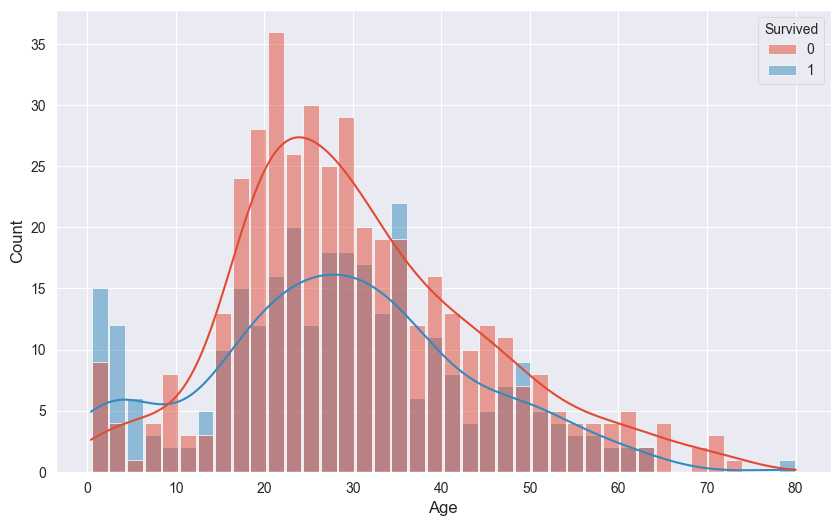

In [18]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Age', bins=40, shrink=0.9, kde=True, hue='Survived')

plt.show()

Давайте оценим корреляцию между столбцами числовых признаков.

<Axes: >

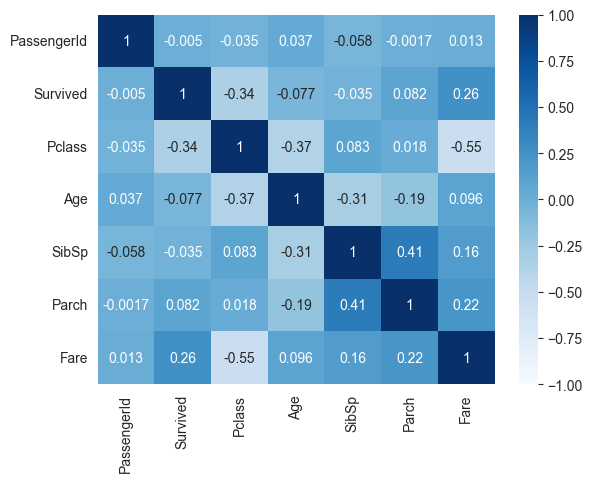

In [19]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, vmin=-1, vmax=1, cmap='Blues')

Построим распредление количества билетов разных классов при помощи bar plot.

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


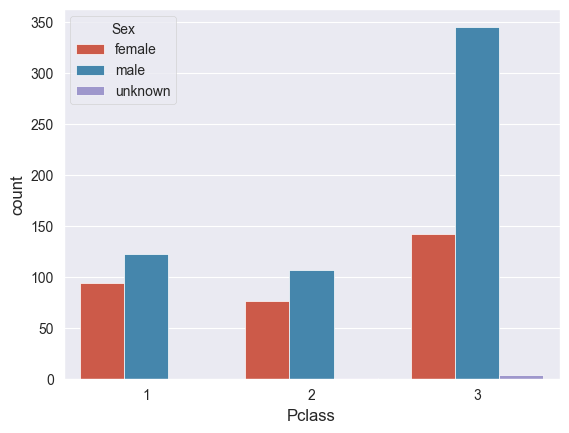

In [21]:
sns.countplot(data=df, x='Pclass', hue='Sex');

Посмотрим на взаимосвязь разных переменных при помощи scatter plot.

Ещё на график можно что-то дорисовать. Например, дополнительные оси.

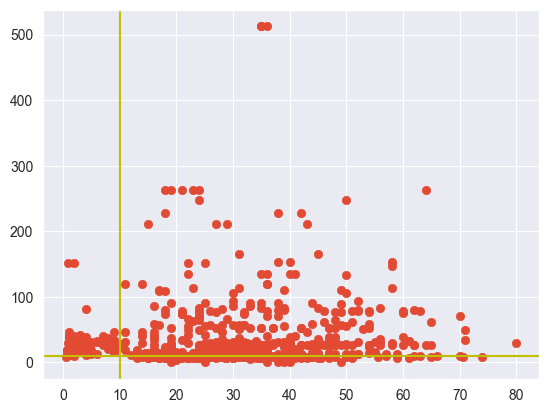

In [22]:
plt.scatter(df["Age"], df["Fare"])
plt.axhline(10, c="y")
plt.axvline(10, c="y");

## 2. Обрабатываем признаки

1. Найдем признаки, у которых есть пропущенные значения, и обработаем эти пропущенные значения
2. Переведём категориальные признаки в числовые

#### Обработаем признак `Sex`

**Задание.** Проверьте, есть ли пропуски в столбце `Sex`.

In [23]:
df.isna().sum()['Sex']

np.int64(0)

In [24]:
df['Sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [25]:
df[df['Sex'] == 'unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,Q
49,50,0,3,Arnold-Franchi; Mrs. Josef (Josefine Franchi),unknown,18.00,1,0,349237,17.8000,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


**Задание *.** Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

In [26]:
mr_ms = df['Name'].apply(lambda x: x.split()[1])

In [27]:
mr_ms.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke;', 'Don.', 'Rev.',
       'Billiard;', 'der', 'Walle;', 'Dr.', 'Pelsmaeker;', 'Mulder;', 'y',
       'Steen;', 'Carlo;', 'Mme.', 'Impe;', 'Ms.', 'Major.', 'Gordon;',
       'Messemaeker;', 'Mlle.', 'Col.', 'Capt.', 'Velde;', 'the',
       'Shawah;', 'Jonkheer.', 'Melkebeke;', 'Cruyssen;'], dtype=object)

In [28]:
# def categories(ser: pd.Series):
#     man_prefix = ['Mr', 'Master']
#     for massive in ser.str.split():
#         for elem in man_prefix:
#             if elem in massive:
#                 return 'male'
#     return 'female'

In [29]:
man_prefix = ['Mr', 'Master']
df.loc[df['Sex'] == 'unknown', 'Sex'] = df.loc[df['Sex'] == 'unknown', 'Name'].apply(lambda x: 'male' if x in man_prefix else 'female')

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание.** Придумайте кодировку и сделайте её.

In [30]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

df = pd.concat(objs=[df, ohe.fit_transform(df[['Sex']])], axis=1).drop(columns=['Sex'])

Data = df

In [31]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
778,779,0,3,Kilgannon; Mr. Thomas J,NaN,0,0,36865,7.7375,NaN,Q,0.0,1.0
353,354,0,3,Arnold-Franchi; Mr. Josef,25.0,1,0,349237,17.8000,NaN,S,0.0,1.0
79,80,1,3,Dowdell; Miss. Elizabeth,30.0,0,0,364516,12.4750,NaN,S,1.0,0.0
635,636,1,2,Davis; Miss. Mary,28.0,0,0,237668,13.0000,NaN,S,1.0,0.0
540,541,1,1,Crosby; Miss. Harriet R,36.0,0,2,WE/P 5735,71.0000,B22,S,1.0,0.0


После первичной обработки можем посмотреть, как влияет пол на выживаемость.

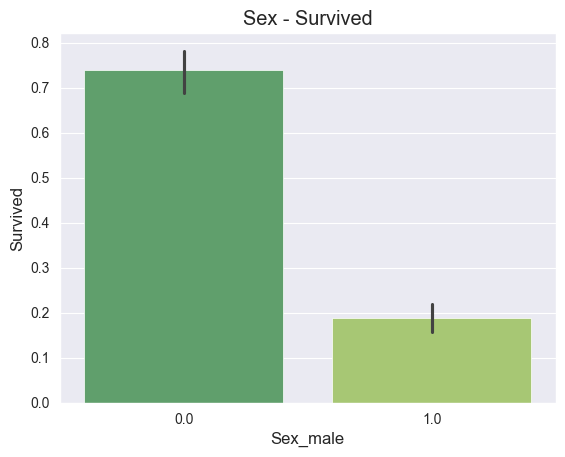

In [32]:
sns.barplot(x="Sex_male", y="Survived", data=Data, palette="summer")
plt.title("Sex - Survived")
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

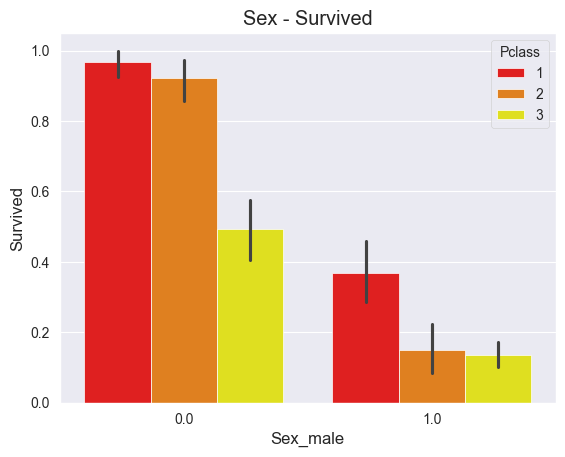

In [33]:
sns.barplot(x="Sex_male", y="Survived", hue="Pclass", data=Data, palette="autumn")
plt.title("Sex - Survived")
plt.show()

Ещё один полезный вид визуализации — ящик с усами. Такой вид графиков позволяет визуально оценить моду и разброс распределения признака. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

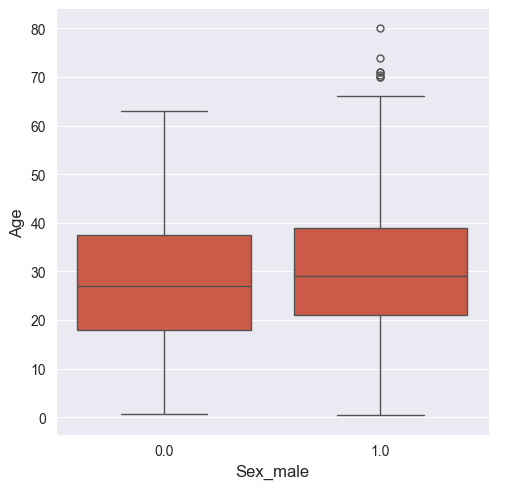

In [35]:
sns.catplot(x="Sex_male", y="Age", data=Data, kind="box")  # box plot (box-and-whiskers-plot)
plt.show()

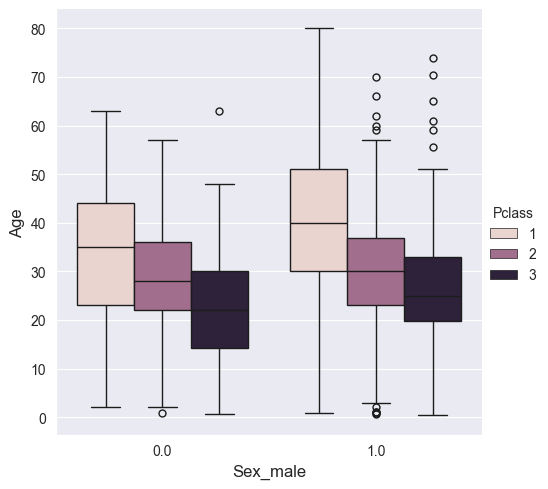

In [37]:
sns.catplot(x="Sex_male", y="Age", hue="Pclass", data=Data, kind="box")
plt.show()

#### Обработаем признак `Embarked` (порт посадки)

In [38]:
print(f"Data size: {Data.shape}")
Data["Embarked"].value_counts(dropna=False)

Data size: (891, 13)


Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

**Задание.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки.

In [39]:
df.dropna(subset='Embarked', inplace=True, how='any')

In [40]:
print(f"Data size: {Data.shape}")
Data["Embarked"].value_counts(dropna=False)

Data size: (889, 13)


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**Задание.** Преобразуем столбец `Embarked` методом OneHot-кодирования при помощи `pd.get_dummies)`.

In [41]:
# ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

df = pd.merge(left=df, right=ohe.fit_transform(df[['Embarked']]), left_index=True, right_index=True)

In [42]:
df = df.drop(columns=['Embarked'])

#### Обработаем признак `Age`

Проверьте, если ли в `Age` пропущенные значения.

In [45]:
df['Age'].describe().T.to_frame().style.background_gradient('Blues')

,Age
count,712.000000
mean,29.642093
std,14.492933
min,0.420000
25%,20.000000
50%,28.000000
75%,38.000000
max,80.000000


In [46]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

Заполним пропуски медианным значением `Age`.

In [47]:
df['Age'] = df['Age'].fillna(df['Age'].median())

Нарисуем распределение возраста пассажиров.

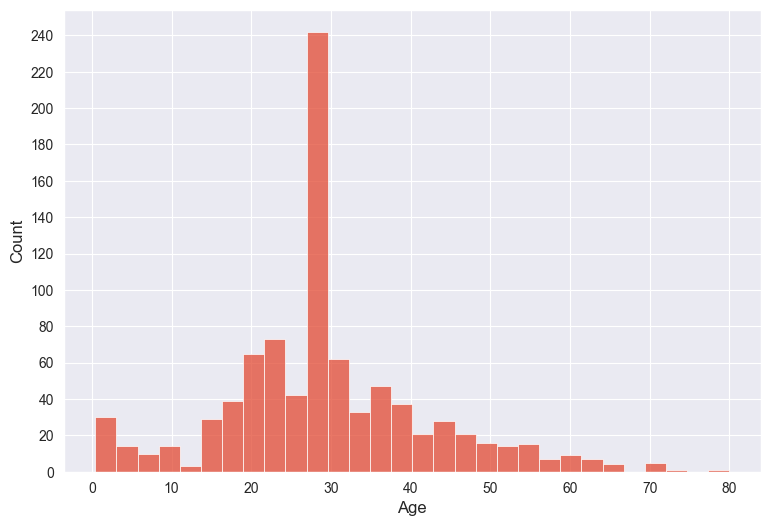

In [54]:
plt.figure(figsize=(9, 6))

sns.histplot(data=df, x='Age')


plt.yticks([x for x in range(0, 251, 20)])
plt.show()

Посмотрим на распределение `Pclass` по возрастам.

In [ ]:
facet = sns.FacetGrid(data=Data, hue="Pclass", legend_out=True, height=5, aspect=1.5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend(fontsize=20);

#### Обработаем признак `Fare`

**Задание.** Проверьте, если ли в `Fare` пропущенные значения. Если пропущенные значения есть, заполните их медианным значением `Fare`.

In [ ]:
# <YOUR CODE HERE>

#### Обработаем признак `Pclass`

**Задание.** Проверьте, если ли в `Pclass` пропущенные значения. Если пропущенные значения есть, заполните их самым частым значением `Pclass`.

In [ ]:
# <YOUR CODE HERE>

**Задание.** Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.

In [ ]:
# <YOUR CODE HERE>

#### Обработаем признак `SibSp` (число братьев или сестер, мужей, жен)

Проверим, если ли в `SibSp` пропущенные значения.

In [ ]:
Data["SibSp"].value_counts()

#### Обработаем признак `Parch` (число братьев или сестер, мужей, жен)

Проверим, если ли в `Parch` пропущенные значения.

In [ ]:
Data["Parch"].value_counts()

**Задание.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [ ]:
# <YOUR CODE HERE>

In [ ]:
Data.head()

## 3. Feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной.

**Задание.** Создайте таблицу `NumericData`, которая содержит только числовые столбцы из таблицы `Data`.

In [ ]:
# <YOUR CODE HERE>
NumericData = ...

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))

plt.title("Pearson Correlation of Features", y=1.05, size=18)
sns.heatmap(
    NumericData.corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor="white",
    annot=True,
);

Посмотрим на попарные зависимости между некоторыми признаками.

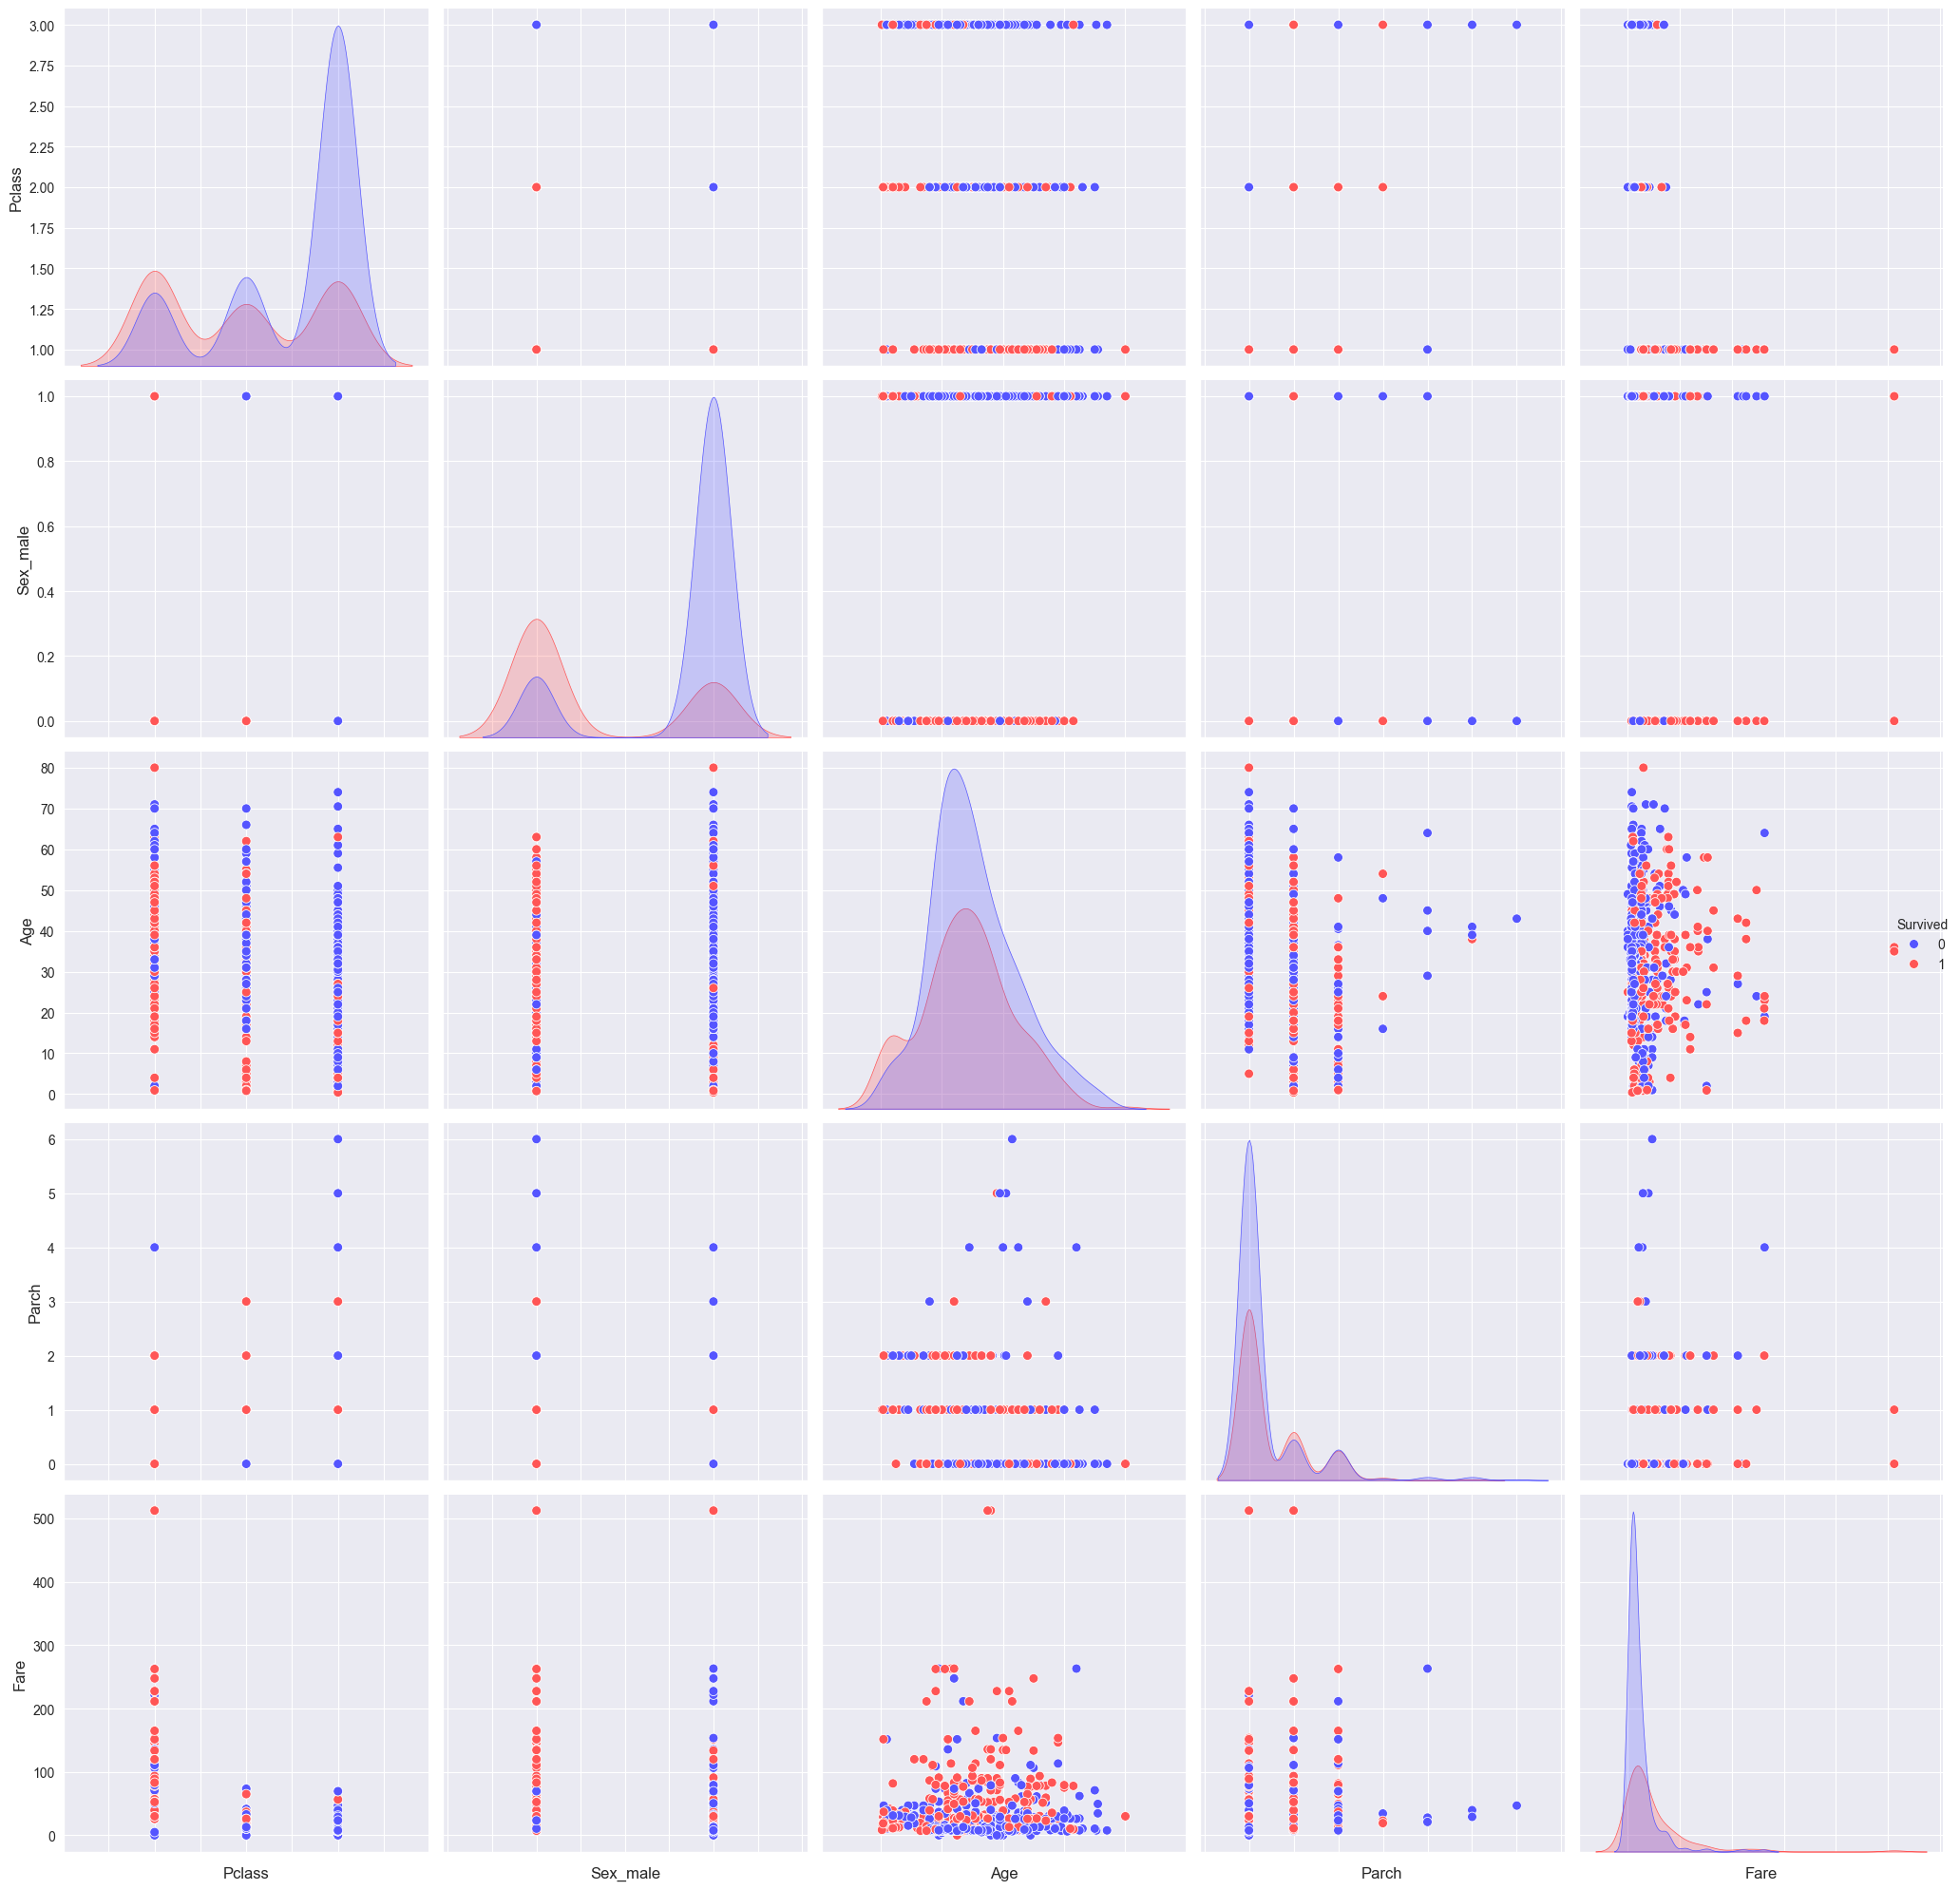

In [57]:
g = sns.pairplot(
    Data[["Survived", "Pclass", "Sex_male", "Age", "Parch", "Fare"]],
    hue="Survived",
    palette="seismic",
    size=4,
    diag_kind="kde",
    diag_kws=dict(shade=True),
    plot_kws=dict(s=50),
)
g.set(xticklabels=[])

plt.tight_layout()
plt.show()

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки `Age` и `Fare`.

* `pd.cut` — разбиение целочисленных данных на несколько интервалов по квантилям
* `pd.qcut` — разбиение числовых (необязательно целочисленных) данных на несколько интервалов по квантилям

In [ ]:
Data["AgeBin"] = pd.cut(Data["Age"].astype(int), 5)
Data["AgeBin"].head()

Теперь переведём полученные интервалы в числа, используя `LabelEncoder`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
Data["AgeBin_Code"] = label.fit_transform(Data["AgeBin"])
Data[["Age", "AgeBin", "AgeBin_Code"]].head()

**Задание.** Бинаризуйте `Fare`, используя разбиение на 4 интервала.

In [ ]:
# <YOUR CODE HERE>

## Бонус

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Сконструируем новые признаки, чтобы решить эти проблемы.

**Задание.**

1) Создайте признак `NameLen` и запишите в него длину имени (Name).

2) Создайте признак `FamilySize`, равный `Parch` + `SibSp` + 1. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [ ]:
# <YOUR CODE HERE>

**Задание.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом `Survived`.

In [ ]:
# <YOUR CODE HERE>

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание.** Придумайте новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
# <YOUR CODE HERE>

**Задание.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то он не влияет на неё и бесполезен для нашей задачи?

Мы провели довольно подробный однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет. 

**Задание.**

a) Попробуйте написать свою модель для предсказания выживаемости, используя обнаруженные закономерности

b) Оцените качество модели: вычислите долю правильных ответов алгоритма по всем данным

In [ ]:
def prediction(x):
    # x - один объект
    ...

In [ ]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)
accuracy_score(Data["Survived"], pred)

**Задание.**

Разобъем данные на тренировочную и тестовую часть с помощью `train_test_split`.

a) Обучите KNN на тренировочной части, сделайте предсказание на тесте и вычислите долю правильных ответов

b) С помощью написанной вами раннее модели сделайте предсказание на тесте и оцените его качество

In [ ]:
from sklearn.model_selection import train_test_split

y = Data["Survived"]
X = Data._get_numeric_data().drop("Survived", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# <YOUR CODE HERE>